# TAREA 3
- José Castillo

In [242]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from numpy.matlib import repmat

## Parte 1

1- Utilice una imagen descargada de internet. De dicha imagen sólo utilice una sección de 512x512 
píxeles (su imagen original debe ser igual o mayor a dicho tamaño).

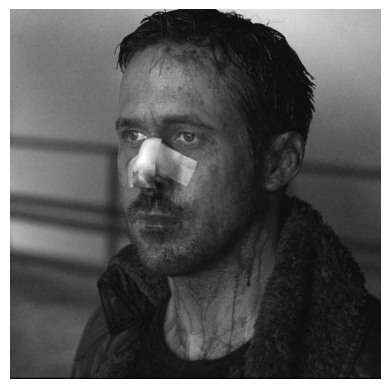

(733, 735)


In [243]:
img =cv2.imread('Ryan Gosling.jpg', cv2.IMREAD_COLOR)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray,cmap="gray"),plt.axis('off')
plt.show()
print(gray.shape)

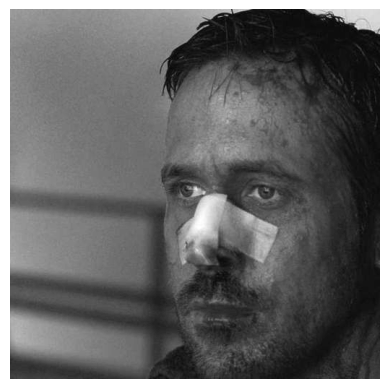

(512, 512)


In [244]:
gray_512= gray[:512, :512]
plt.imshow(gray_512,cmap="gray"),plt.axis('off')
plt.show()
print(gray_512.shape)

### Genere una imagen ruido frecuencial de 10Hz, una segunda imagen con 30Hz y una tercera imagen con 50Hz en forma vertical respectivamente (usted define la amplitud de la señal). 

In [245]:
def add_noise(imagen,A,F,ancho,largo):
    t = np.linspace(0,1,ancho)
    signal = A*np.sin(2*np.pi*F*t)
    S = repmat(signal,largo,1)
    gray_n = cv2.normalize(imagen.astype(float),None,0,1,cv2.NORM_MINMAX)
    gray_noise = cv2.add(S,gray_n)
    return gray_noise


(<Axes: title={'center': 'Ruido de 50 HZ'}>,
 Text(0.5, 1.0, 'Ruido de 50 HZ'),
 (-0.5, 511.5, 511.5, -0.5))

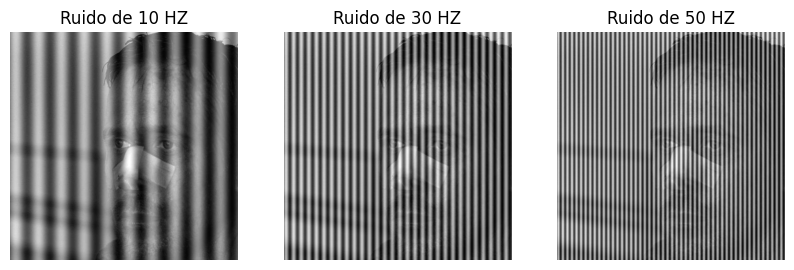

In [246]:
noise_10HZ = add_noise(gray_512,0.5,10,512,512)
noise_30HZ = add_noise(gray_512,0.8,30,512,512)
noise_50HZ = add_noise(gray_512,0.9,50,512,512)

plt.figure(figsize=(10,10))
plt.subplot(1,3,1),plt.imshow(noise_10HZ,cmap="gray"),plt.title("Ruido de 10 HZ"),plt.axis('off')
plt.subplot(1,3,2),plt.imshow(noise_30HZ,cmap="gray"),plt.title("Ruido de 30 HZ"),plt.axis('off')
plt.subplot(1,3,3),plt.imshow(noise_50HZ,cmap="gray"),plt.title("Ruido de 50 HZ"),plt.axis('off')


### Genere una imagen que atenúe el ruido empleando filtros en la frecuencia para cada imagen del paso #2

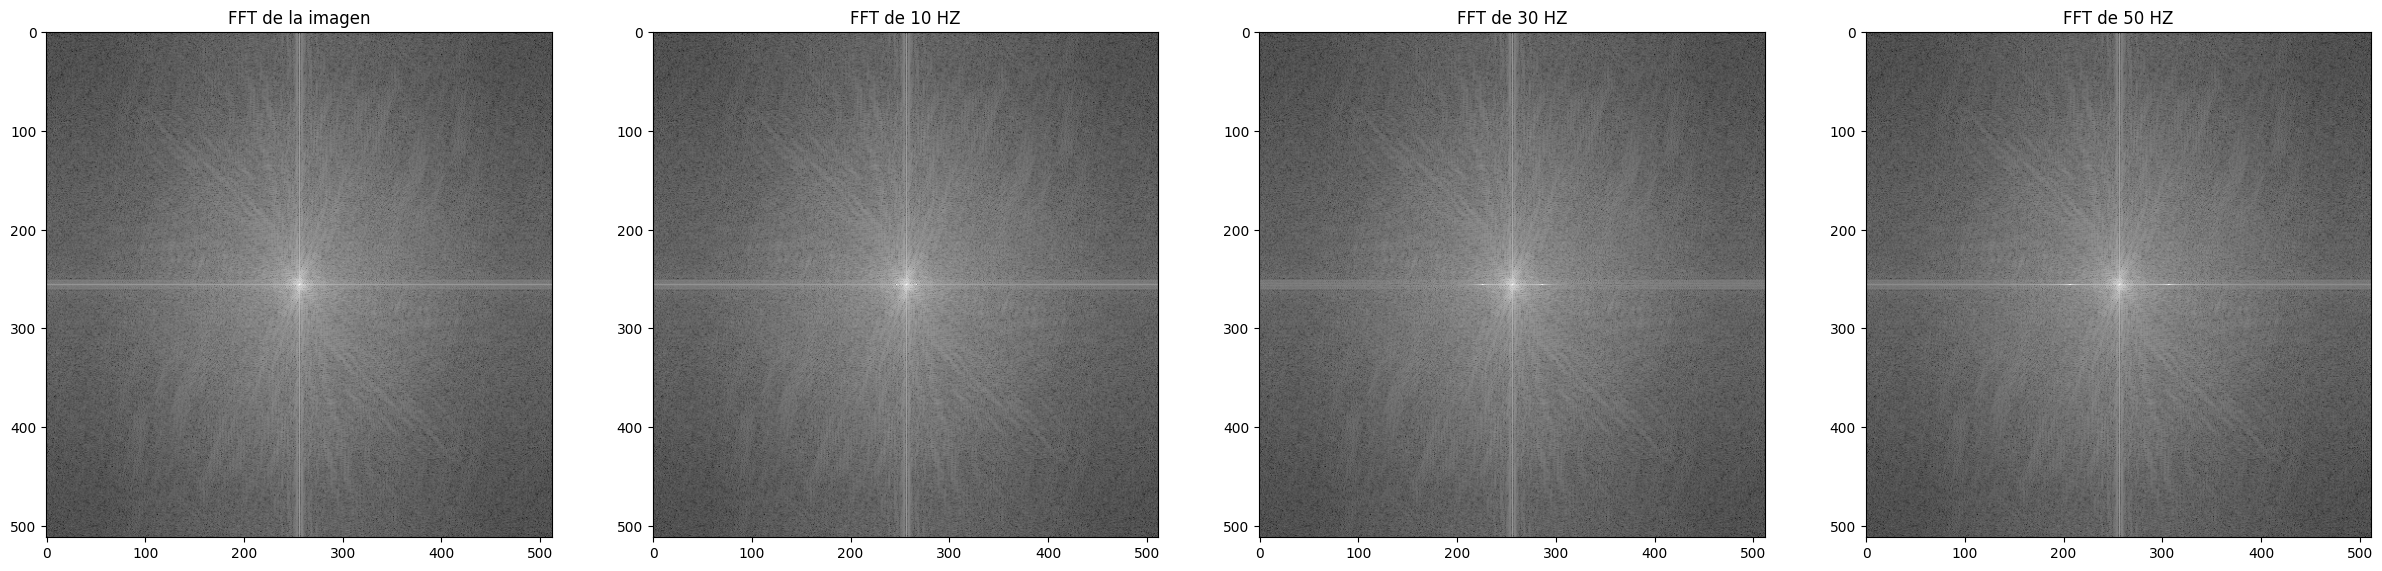

In [247]:
fft_img=np.fft.fftshift(np.fft.fft2(gray_512))
fft_noise_10HZ=np.fft.fftshift(np.fft.fft2(noise_10HZ))
fft_noise_30HZ=np.fft.fftshift(np.fft.fft2(noise_30HZ))
fft_noise_50HZ=np.fft.fftshift(np.fft.fft2(noise_50HZ))

plt.figure(figsize=(30,15))
plt.subplot(1,4,1),plt.imshow(np.log(np.abs(fft_img)),cmap="gray"),plt.title("FFT de la imagen")
plt.subplot(1,4,2),plt.imshow(np.log(np.abs(fft_noise_10HZ)),cmap="gray"),plt.title("FFT de 10 HZ")
plt.subplot(1,4,3),plt.imshow(np.log(np.abs(fft_noise_30HZ)),cmap="gray"),plt.title("FFT de 30 HZ")
plt.subplot(1,4,4),plt.imshow(np.log(np.abs(fft_noise_50HZ)),cmap="gray"),plt.title("FFT de 50 HZ")
plt.show()









Función para eliminar el ruido

In [248]:
def marcar_frecuencia(imagen_ruido,a):
    m, n = imagen_ruido.shape
    line_x1 = m/2 - a  # Línea en la frecuencia de a Hz
    line_x2 = m/2 + a  # Línea en la frecuencia de a Hz
    # Mostrar el espectro de Fourier
    plt.figure(figsize=(10, 10))
    plt.imshow(np.log(np.abs(imagen_ruido)), cmap="gray")
    plt.axvline(x=line_x1, color='r', linestyle='--')  # Línea vertical izquierda
    plt.axvline(x=line_x2, color='r', linestyle='--')  # Línea vertical derecha
    plt.title("FFT")
    plt.show()

    return line_x1,line_x2



Reduccion de Ruido para la imagen de 10HZ De ruido

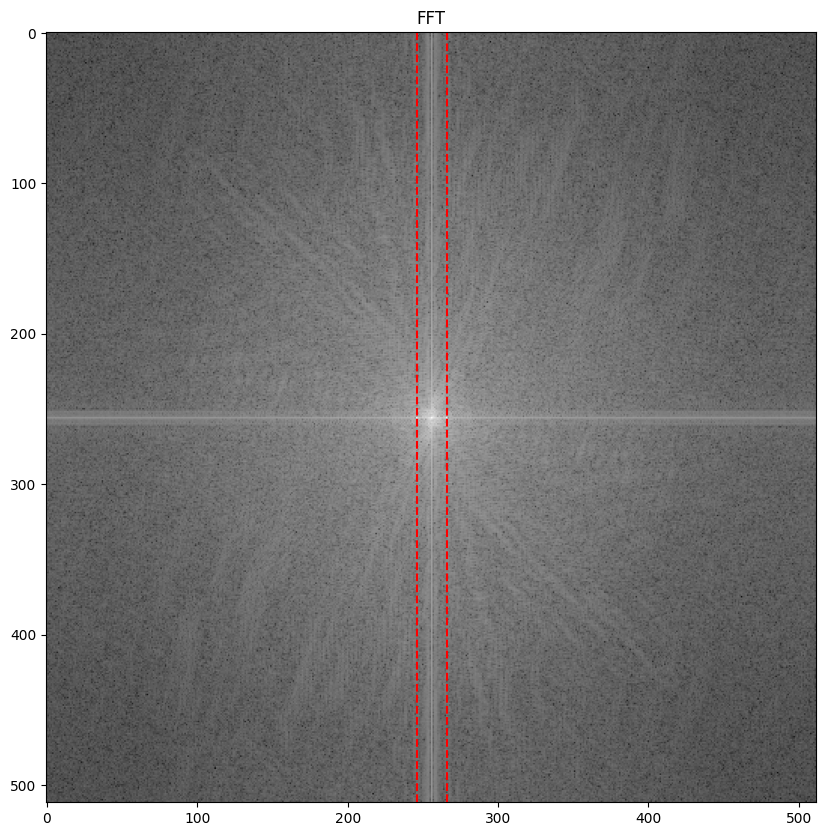

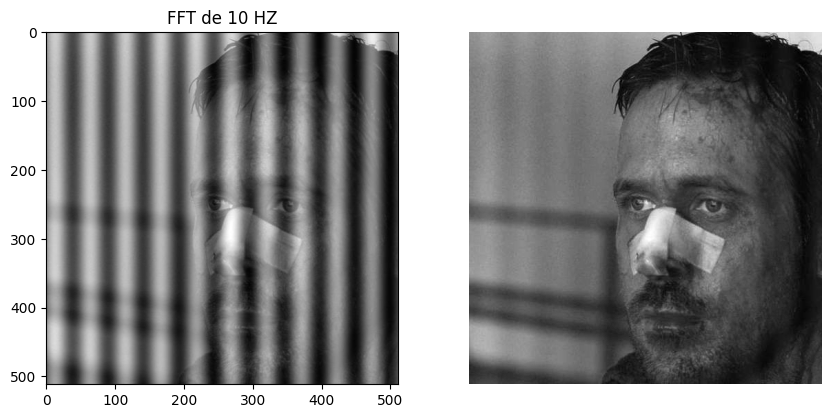

In [249]:
x1,x2=marcar_frecuencia(fft_noise_10HZ,10)
m, n = fft_noise_10HZ.shape

# Bloquear la frecuencia especificada en la línea x1 y x2
fft_noise_10HZ[int(m/2), int(x2)] = 0
fft_noise_10HZ[int(m/2), int(x1)] = 0

# Inversa de Fourier
gray_10hz_SR = np.fft.ifft2(np.fft.ifftshift(fft_noise_10HZ))
gray_10hz_SR = np.abs(gray_10hz_SR)

plt.figure(figsize=(10,10))
plt.subplot(1,2,1),plt.imshow(noise_10HZ,cmap="gray"),plt.title("FFT de 10 HZ")
plt.subplot(1,2,2),plt.imshow(gray_10hz_SR, cmap="gray"), plt.axis('off')
plt.show()




Reduccion de Ruido para la imagen de 30HZ De ruido

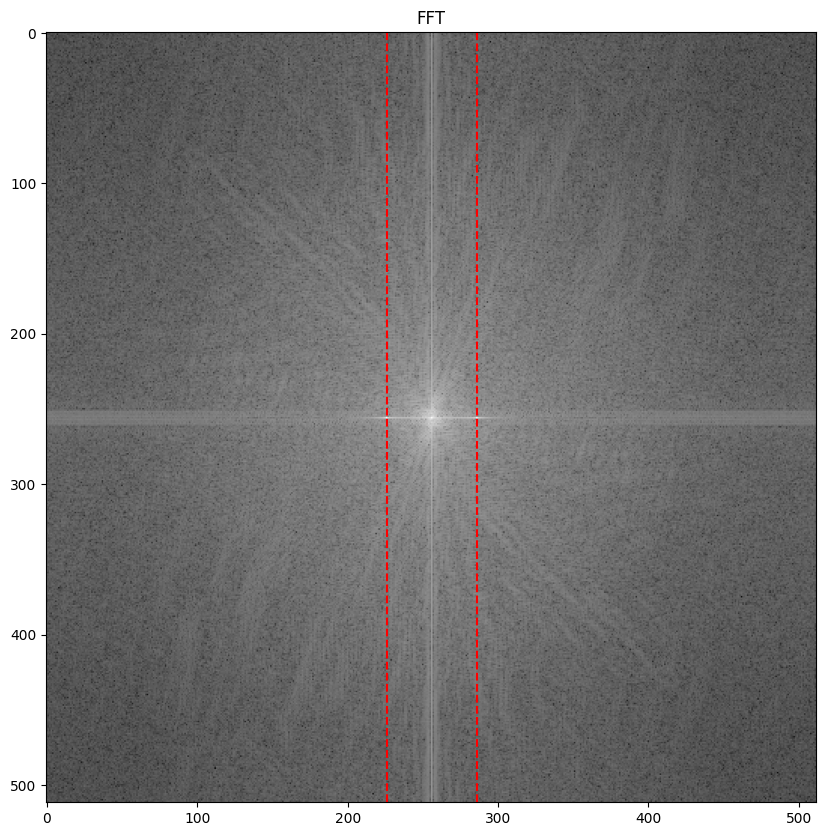

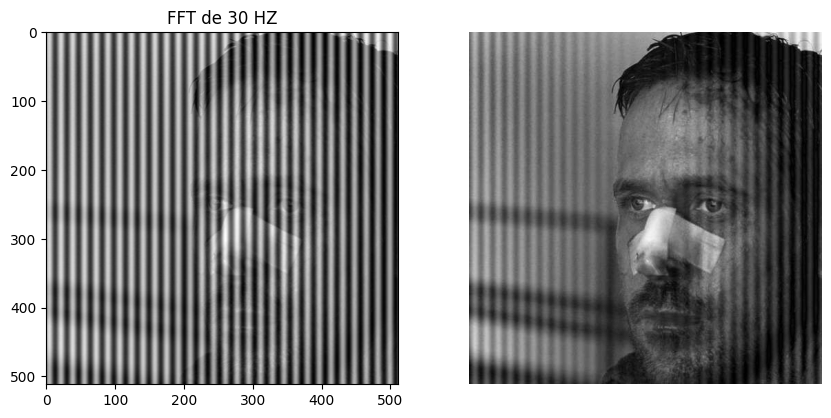

In [250]:
x1,x2=marcar_frecuencia(fft_noise_30HZ,30)
m, n = fft_noise_30HZ.shape

# Bloquear la frecuencia especificada en la línea x1 y x2
fft_noise_30HZ[int(m/2), int(x2)] = 0
fft_noise_30HZ[int(m/2), int(x1)] = 0

# Inversa de Fourier
gray_30hz_SR = np.fft.ifft2(np.fft.ifftshift(fft_noise_30HZ))
gray_30hz_SR = np.abs(gray_30hz_SR)

plt.figure(figsize=(10,10))
plt.subplot(1,2,1),plt.imshow(noise_30HZ,cmap="gray"),plt.title("FFT de 30 HZ")
plt.subplot(1,2,2),plt.imshow(gray_30hz_SR, cmap="gray"), plt.axis('off')
plt.show()


Reduccion de Ruido para la imagen de 50HZ De ruido

C:\Users\josen\AppData\Local\Temp\ipykernel_18160\2272411351.py:7: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(np.abs(imagen_ruido)), cmap="gray")


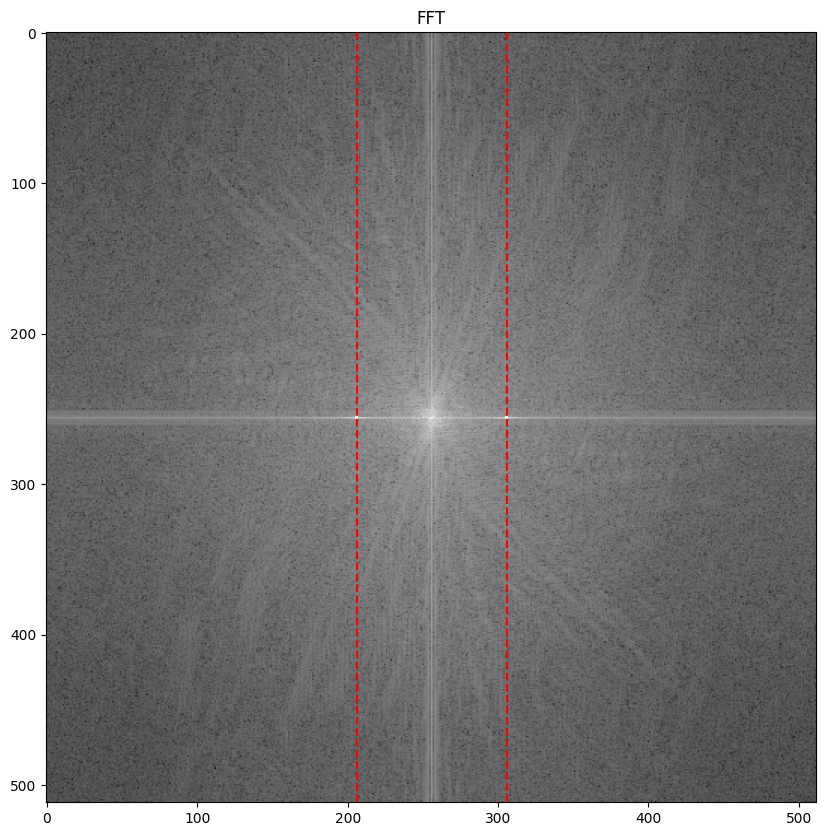

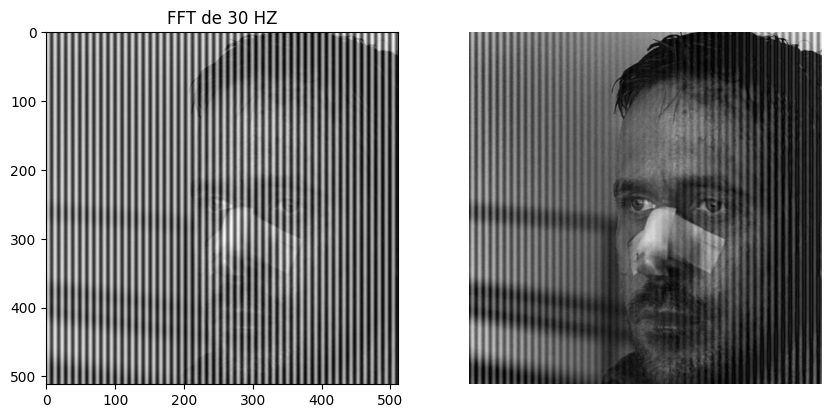

In [252]:
x1,x2=marcar_frecuencia(fft_noise_50HZ,50)
m, n = fft_noise_50HZ.shape

# Bloquear la frecuencia especificada en la línea x1 y x2
fft_noise_50HZ[int(m/2), int(x2)] = 0
fft_noise_50HZ[int(m/2), int(x1)] = 0

# Inversa de Fourier
gray_50hz_SR = np.fft.ifft2(np.fft.ifftshift(fft_noise_50HZ))
gray_50hz_SR = np.abs(gray_50hz_SR)

plt.figure(figsize=(10,10))
plt.subplot(1,2,1),plt.imshow(noise_50HZ,cmap="gray"),plt.title("FFT de 30 HZ")
plt.subplot(1,2,2),plt.imshow(gray_50hz_SR, cmap="gray"), plt.axis('off')
plt.show()



## Parte 2


Genere una imagen con ruido empleando el siguiente código (no lo modifique).  Luego desarrolle un 
filtro en la frecuencia para reducir dicho ruido. Usted debe definir el filtro más apropiado.

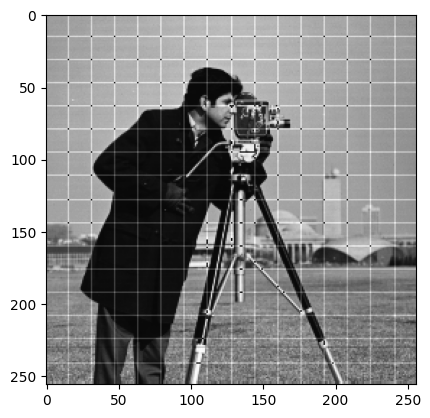

In [253]:
import cv2 
import numpy as np 
import matplotlib.pyplot as plt     
 
img = cv2.imread('cameraman.png',cv2.IMREAD_GRAYSCALE) 
m = img.shape[0] 
delta = 15 
V = np.fix(np.linspace(delta,m-delta,delta)).astype('uint8') 
 
img[V,:] = img[V,:]+50 
img[:,V] = img[:,V]+50 
plt.imshow(img, cmap='gray') 
plt.show() 




Tranformada de Forier

In [275]:
#Funciones Filtro

#Filtro pasa bajos/altos ideal
def filtro_pasa_ideal(imagen, r,tipo):
    x= np.linspace(-127, 128,256)
    y= np.linspace(-127, 128,256)
    X, Y = np.meshgrid(x,y)

    if tipo == 'bajos':
        Z = np.sqrt(np.power(X,2)+np.power(Y,2))<r
    if tipo == 'altos':
        Z = np.sqrt(np.power(X,2)+np.power(Y,2))>r
    F = np.fft.fft2(imagen)
    fshift = np.fft.fftshift(F)
    fshift = fshift*Z

    # Transformada inversa de Fourier
    f_ishift = np.fft.ifftshift(fshift)
    img_back = np.fft.ifft2(f_ishift)
    img_back = np.abs(img_back)

    # Normalizar la imagen para visualización
    out = cv2.normalize(img_back, None, 0.0, 1.0, cv2.NORM_MINMAX)

    return out


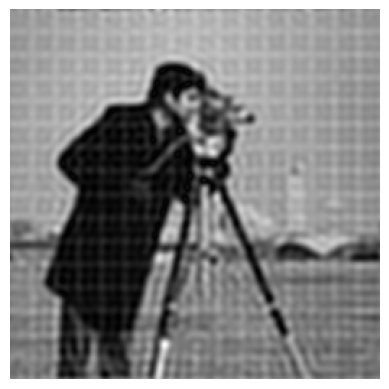

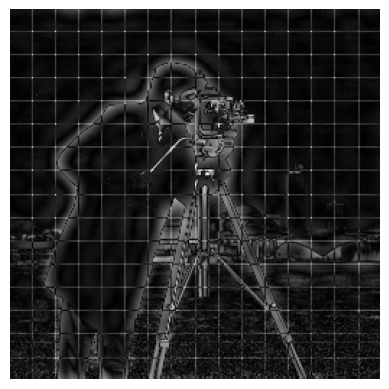

In [280]:

plt.imshow(filtro_pasa_ideal(img, 35,"bajos"), cmap='gray'),plt.axis('off')
plt.show()
plt.imshow(filtro_pasa_ideal(img, 10,"altos"), cmap='gray'),plt.axis('off')
plt.show()

Filtro pasabajos gaussiano

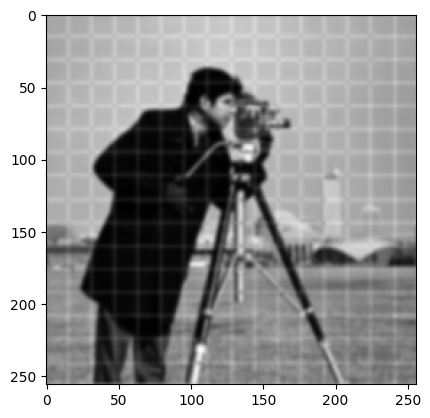

In [284]:
x= np.linspace(-127, 128,256)
y= np.linspace(-127, 128,256)
X, Y = np.meshgrid(x,y)

#creamos el filtro
H= np.exp(-0.0005*(X**2+Y**2))
UH = np.fft.fftshift(H)

F     = np.fft.fft2(img)
FILT= UH*F
S    = np.fft.ifft2(np.fft.fftshift(FILT))
outpasabajos_gaussiano = cv2.normalize(abs(S), None, 0.0, 1.0, cv2.NORM_MINMAX)

plt.imshow(outpasabajos_gaussiano,cmap="gray")
plt.show()